In [1]:
%load_ext autoreload
%autoreload 2

# Importing libraries and modules

In [4]:
from os import sys
sys.path.append("/python_tools/python_tools/")
sys.path.append("../../../graph_tools/")

In [85]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

# from python_tools
import networkx_utils as xu

# from the graph_tools
import graph_visualizations as gviz
import graph_statistics as gs

# Problem 1.1: Basic Graph Theory

### 1.1.1 Triangles and algebraic Representation

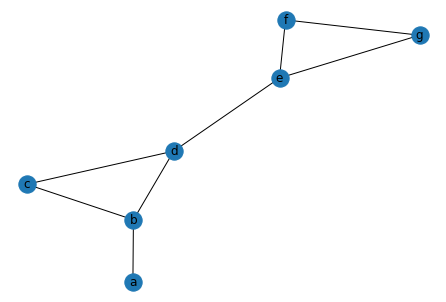

In [6]:
nodes = ['a','b','c','d','e','f','g']
edgelist = [
    ['a','b'],
    ['b','c'],
    ['b','d'],
    ['c','d'],
    ['d','e'],
    ['e','f'],
    ['e','g'],
    ['f','g'],
]

G = nx.from_edgelist(edgelist)
nx.draw(G,with_labels = True)

#### -- a) Find two adjacency matricies

In [28]:
# -- the mapping functions l: V --> N
node_to_idx_1 = {k:i%len(nodes) + 1 for i,k in enumerate(nodes)}
node_to_idx_2 = {k:(i+1)%len(nodes) + 1 for i,k in enumerate(nodes)}

In [30]:
def node_order_from_mapping(node_map):
    idx = np.sort(list(node_map.values())).astype('int')
    reverse_map = {v:k for k,v in node_map.items()}
    return [reverse_map[k] for k in idx]

adj_1 = nx.adjacency_matrix(
    G,nodelist = node_order_from_mapping(node_to_idx_1)
)

print(f"Adjacency Matrix 1:")
print(f"node_to_idx_1 = {node_to_idx_1}")
print(f"\n{repr(adj_1.toarray())}")

adj_2 = nx.adjacency_matrix(
    G,nodelist = node_order_from_mapping(node_to_idx_2)
)

print(f"Adjacency Matrix 2:")
print(f"node_to_idx_2 = {node_to_idx_2}")
print(f"\n{repr(adj_2.toarray())}")

Adjacency Matrix 1:
node_to_idx_1 = {'a': 1, 'b': 2, 'c': 3, 'd': 4, 'e': 5, 'f': 6, 'g': 7}

array([[0, 1, 0, 0, 0, 0, 0],
       [1, 0, 1, 1, 0, 0, 0],
       [0, 1, 0, 1, 0, 0, 0],
       [0, 1, 1, 0, 1, 0, 0],
       [0, 0, 0, 1, 0, 1, 1],
       [0, 0, 0, 0, 1, 0, 1],
       [0, 0, 0, 0, 1, 1, 0]])
Adjacency Matrix 2:
node_to_idx_2 = {'a': 2, 'b': 3, 'c': 4, 'd': 5, 'e': 6, 'f': 7, 'g': 1}

array([[0, 0, 0, 0, 0, 1, 1],
       [0, 0, 1, 0, 0, 0, 0],
       [0, 1, 0, 1, 1, 0, 0],
       [0, 0, 1, 0, 1, 0, 0],
       [0, 0, 1, 1, 0, 1, 0],
       [1, 0, 0, 0, 1, 0, 1],
       [1, 0, 0, 0, 0, 1, 0]])


In [35]:
P = np.roll(np.eye(*adj_1.shape),-1,axis = 1)
print(f"P (Permutation matrix):\n{repr(P)}")

P (Permutation matrix):
array([[0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0.]])


In [36]:
# verifying that adj_2 is the same as perumuting adj_1
A = adj_1
A_prime = P@A@(P.T)
A_prime

array([[0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 1., 1., 0., 0.],
       [0., 0., 1., 0., 1., 0., 0.],
       [0., 0., 1., 1., 0., 1., 0.],
       [1., 0., 0., 0., 1., 0., 1.],
       [1., 0., 0., 0., 0., 1., 0.]])

In [44]:
def n_triangles(M):
    return (np.trace(M@M@M)/6).astype('int')

print(f"# of triangles in adj_1 = {n_triangles(adj_1.toarray())}")
print(f"# of triangles in adj_2 = {n_triangles(adj_2.toarray())}")

# of triangles in adj_1 = 2
# of triangles in adj_2 = 2


### 1.1.2 Vectors and Matrices

In [55]:
node_order_from_mapping(node_to_idx_1)

['a', 'b', 'c', 'd', 'e', 'f', 'g']

array([[0, 1, 0, 0, 0, 0, 0],
       [0, 0, 1, 1, 0, 0, 0],
       [0, 1, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 1, 1],
       [0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 1]])

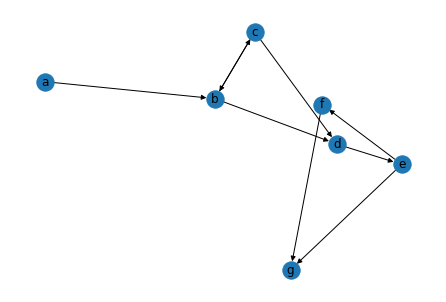

In [68]:
G_dir = nx.DiGraph()
G_dir.add_edges_from(edgelist + [['g','g'],['c','b']])
A = nx.adjacency_matrix(G_dir,nodelist = node_order_from_mapping(node_to_idx_1)).toarray()
nx.draw(G_dir,with_labels = True)
A

In [66]:
din = A.T@np.ones((len(A),1))
dout = A@np.ones((len(A),1))
print(f"din = {din.T}")
print(f"dout = {dout.T}")


din = [[0. 1. 1. 2. 1. 1. 3.]]
dout = [[1. 2. 1. 1. 2. 1. 1.]]


#### b) Number of self loops

In [70]:
np.trace(A)

1

#### c) Number of mutual edges

In [69]:
np.trace(A@A)/2

1.5

# d) Local Clustering Coefficient

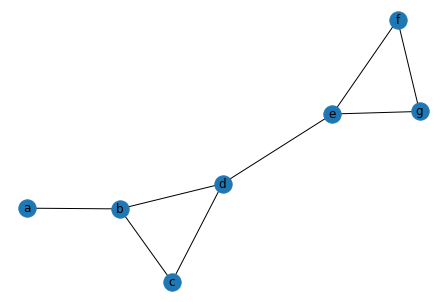

In [79]:
nx.draw(G,with_labels = True)

In [77]:
A = adj_1.toarray()

def local_clustering_coeff_vector(M):
    ones_vec = np.ones((len(M),1))
    return ((1/6)*np.trace(M@M@M))/((M@ones_vec)*((M@ones_vec) - 1))

local_clustering_coeff_vector(A)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in true_divide
  """


array([[       inf],
       [0.33333333],
       [1.        ],
       [0.33333333],
       [0.33333333],
       [1.        ],
       [1.        ]])

### 1.1.3 Star Network

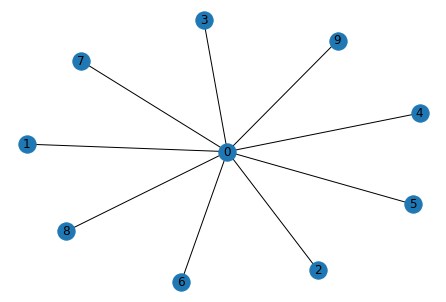

In [90]:
N = 9
S = nx.star_graph(N)
nx.draw(S,with_labels = True)

#### a) degree distribution as pmf

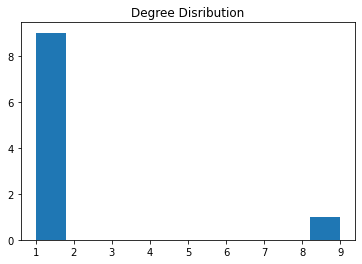

In [92]:
gviz.plot_degree_distribution_simple(S)

#### b) Expected value of degree distribution

In [91]:
np.mean(gs.degree_distribution(S))

1.8

#### c) Global Clustering coefficient

In [93]:
gs.transitivity(S)

0

# Problem 2: Centrality

## 1.2.2 Path betweeness

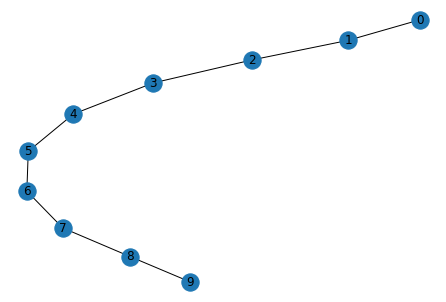

In [100]:
N = 10
G = nx.path_graph(N)
nx.draw(G,with_labels = True)

In [103]:
gs.betweenness_centrality(
    G,
    normalized=False,
    endpoints = False
)

{0: 0.0,
 1: 8.0,
 2: 14.0,
 3: 18.0,
 4: 20.0,
 5: 20.0,
 6: 18.0,
 7: 14.0,
 8: 8.0,
 9: 0.0}

In [111]:
def betweeness_centrality_manual(i):
    return (i-1)*(N-i)

betweeness_centrality_manual(4)

18

## 1.2.3: Regular Centralities

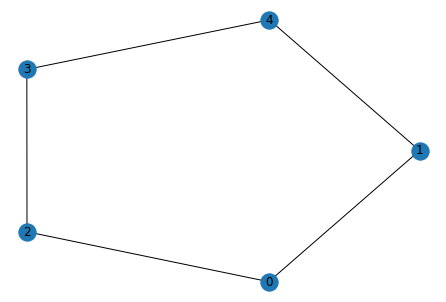

In [117]:
N = 5
k = 2

G = nx.random_regular_graph(k,N)
nx.draw(G,with_labels = True)

In [118]:
gs.eigenvector_centrality(G)

{0: 0.4472135954999579,
 1: 0.4472135954999579,
 4: 0.4472135954999579,
 2: 0.4472135954999579,
 3: 0.4472135954999579}